# Import Library

In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import datetime
from scipy.stats import zscore
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as mpl
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import numpy as np
import tensorflow as ts 
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from sklearn.inspection import permutation_importance

# Import Dataset

In [3]:
dataset = pd.read_csv("GlobalWeatherRepository.csv")

# Explore Data Analsis

In [4]:
dataset.head()

,country,location_name,latitude,longitude,timezone,last_updated_epoch,last_updated,temperature_celsius,temperature_fahrenheit,condition_text,...,air_quality_PM2.5,air_quality_PM10,air_quality_us-epa-index,air_quality_gb-defra-index,sunrise,sunset,moonrise,moonset,moon_phase,moon_illumination
0,Afghanistan,Kabul,34.52,69.18,Asia/Kabul,1715849100,2024-05-16 13:15,26.6,79.8,Partly Cloudy,...,8.4,26.6,1,1,04:50 AM,06:50 PM,12:12 PM,01:11 AM,Waxing Gibbous,55
1,Albania,Tirana,41.33,19.82,Europe/Tirane,1715849100,2024-05-16 10:45,19.0,66.2,Partly cloudy,...,1.1,2.0,1,1,05:21 AM,07:54 PM,12:58 PM,02:14 AM,Waxing Gibbous,55
2,Algeria,Algiers,36.76,3.05,Africa/Algiers,1715849100,2024-05-16 09:45,23.0,73.4,Sunny,...,10.4,18.4,1,1,05:40 AM,07:50 PM,01:15 PM,02:14 AM,Waxing Gibbous,55
3,Andorra,Andorra La Vella,42.50,1.52,Europe/Andorra,1715849100,2024-05-16 10:45,6.3,43.3,Light drizzle,...,0.7,0.9,1,1,06:31 AM,09:11 PM,02:12 PM,03:31 AM,Waxing Gibbous,55
4,Angola,Luanda,-8.84,13.23,Africa/Luanda,1715849100,2024-05-16 09:45,26.0,78.8,Partly cloudy,...,183.4,262.3,5,10,06:12 AM,05:55 PM,01:17 PM,12:38 AM,Waxing Gibbous,55


In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62558 entries, 0 to 62557
Data columns (total 41 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   country                       62558 non-null  object 
 1   location_name                 62558 non-null  object 
 2   latitude                      62558 non-null  float64
 3   longitude                     62558 non-null  float64
 4   timezone                      62558 non-null  object 
 5   last_updated_epoch            62558 non-null  int64  
 6   last_updated                  62558 non-null  object 
 7   temperature_celsius           62558 non-null  float64
 8   temperature_fahrenheit        62558 non-null  float64
 9   condition_text                62558 non-null  object 
 10  wind_mph                      62558 non-null  float64
 11  wind_kph                      62558 non-null  float64
 12  wind_degree                   62558 non-null  int64  
 13  w

In [7]:
dataset.describe()

,latitude,longitude,last_updated_epoch,temperature_celsius,temperature_fahrenheit,wind_mph,wind_kph,wind_degree,pressure_mb,pressure_in,...,gust_kph,air_quality_Carbon_Monoxide,air_quality_Ozone,air_quality_Nitrogen_dioxide,air_quality_Sulphur_dioxide,air_quality_PM2.5,air_quality_PM10,air_quality_us-epa-index,air_quality_gb-defra-index,moon_illumination
count,62558.000000,62558.000000,6.255800e+04,62558.000000,62558.000000,62558.000000,62558.000000,62558.00000,62558.000000,62558.000000,...,62558.000000,62558.000000,62558.000000,62558.000000,62558.000000,62558.000000,62558.000000,62558.000000,62558.000000,62558.000000
mean,19.135102,22.179739,1.729789e+09,22.114984,71.808573,8.289319,13.344247,168.77317,1014.158749,29.947492,...,19.076479,528.699723,63.645083,15.219793,11.443068,25.700084,51.932406,1.736437,2.730043,48.911314
std,24.475027,65.818865,8.076019e+06,9.597657,17.275580,9.104434,14.650297,103.72881,13.330807,0.393639,...,16.521902,929.273599,35.900121,26.369751,47.915557,44.232769,159.726132,0.993934,2.603642,35.071190
min,-41.300000,-175.200000,1.715849e+09,-24.900000,-12.800000,2.200000,3.600000,1.00000,947.000000,27.960000,...,3.600000,-9999.000000,0.000000,0.000000,-9999.000000,0.185000,-1848.150000,1.000000,1.000000,0.000000
25%,3.750000,-6.836100,1.722861e+09,16.500000,61.800000,4.000000,6.500000,80.00000,1010.000000,29.830000,...,10.800000,227.550000,39.700000,0.925000,0.740000,5.900000,9.065000,1.000000,1.000000,14.000000
50%,17.250000,23.316700,1.729848e+09,24.900000,76.900000,6.900000,11.200000,160.00000,1013.000000,29.920000,...,16.600000,329.300000,61.000000,3.515000,2.400000,13.875000,21.090000,1.000000,2.000000,48.000000
75%,40.400000,50.580000,1.736765e+09,28.400000,83.100000,11.400000,18.400000,256.00000,1018.000000,30.050000,...,25.300000,510.600000,83.000000,16.800000,9.065000,30.155000,46.250000,2.000000,3.000000,83.000000
max,64.150000,179.220000,1.743671e+09,49.200000,120.600000,1841.200000,2963.200000,360.00000,3006.000000,88.770000,...,2970.400000,38879.398000,480.700000,427.700000,521.330000,1614.100000,6037.290000,6.000000,10.000000,100.000000


# Data Perprocessing

In [66]:
# Check if there are any missing values 
missing_values=dataset.isnull().sum()
print("Missing values:\n", missing_values)
missing_values = dataset.isnull().sum().sum()
if missing_values > 0:
    print(f"Missing values are present. Total missing values: {missing_values}")
else:
    print(f"No missing values are present in the Dataset.")

Missing values:
 latitude                        0
longitude                       0
last_updated_epoch              0
temperature_celsius             0
temperature_fahrenheit          0
                             ... 
moon_phase_Waxing Gibbous       0
sunrise_min                     0
sunset_min                      0
moonrise_min                 2133
moonset_min                  2046
Length: 73, dtype: int64
Missing values are present. Total missing values: 4179


In [68]:
missing_percent = dataset.isnull().mean() * 100
print(missing_percent[missing_percent > 0].sort_values(ascending=False))


moonrise_min    3.409636
moonset_min     3.270565
dtype: float64


In [ ]:
#handle missing value by Fill with Median
dataset['moonrise_min'] = dataset['moonrise_min'].fillna(dataset['moonrise_min'].median())
dataset['moonset_min'] = dataset['moonset_min'].fillna(dataset['moonset_min'].median())


In [63]:
#check any duplication data
duplicates_count = dataset.duplicated().sum()
if dataset.duplicated().any():
    print(f"Duplicates are present. Total duplicate rows: {duplicates_count}")
else:
    print(f"No duplicates are present in the Dataset.")

No duplicates are present in the Dataset.


In [62]:
#check the data type
dataset.dtypes

latitude                     float64
longitude                    float64
last_updated_epoch             int64
temperature_celsius          float64
temperature_fahrenheit       float64
                              ...   
moon_phase_Waxing Gibbous       bool
sunrise_min                    int64
sunset_min                     int64
moonrise_min                 float64
moonset_min                  float64
Length: 73, dtype: object

In [ ]:
#label encoder for many unique value
label_Encoder = LabelEncoder()
dataset["country_encode"] = label_Encoder.fit_transform(dataset["country"])
dataset["location_name_encode"] = label_Encoder.fit_transform(dataset["location_name"])
dataset['timezone_encoded'] = label_Encoder.fit_transform(dataset['timezone'])

In [19]:
#datetime conversion
dataset["last_updated"] = pd.to_datetime(dataset["last_updated"])
dataset["year"] = dataset["last_updated"].dt.year
dataset["month"] = dataset["last_updated"].dt.month
dataset["day"] = dataset["last_updated"].dt.day
dataset["hour"] = dataset["last_updated"].dt.hour
dataset["minute"] = dataset["last_updated"].dt.minute

In [32]:
dataset['condition_text'] = dataset['condition_text'].apply(
    lambda x: x if dataset['condition_text'].value_counts()[x] >= 50 else 'Others'
)


In [38]:
#one hot encode for low cardinatlity
dataset = pd.get_dummies(dataset,columns=["condition_text","moon_phase"], drop_first=True)

In [41]:
#wind direction encode map to degree
wind_dir_map = {
    'N': 0, 'NNE': 22.5, 'NE': 45, 'ENE': 67.5, 'E': 90, 'ESE': 112.5, 'SE': 135, 'SSE': 157.5,
    'S': 180, 'SSW': 202.5, 'SW': 225, 'WSW': 247.5, 'W': 270, 'WNW': 292.5, 'NW': 315, 'NNW': 337.5
}
dataset["wind_direction"] = dataset["wind_direction"].map(wind_dir_map)

In [44]:
#sunrise, sunset, moonrise, and moonset convert to minutes since midnight
def time_to_minutes(t):
    try:
        t_obj = datetime.datetime.strptime(t.strip(), '%I:%M %p')
        return t_obj.hour * 60 + t_obj.minute
    except:
        return None  # or use 0

dataset['sunrise_min'] = dataset['sunrise'].apply(time_to_minutes)
dataset['sunset_min'] = dataset['sunset'].apply(time_to_minutes)
dataset['moonrise_min'] = dataset['moonrise'].apply(time_to_minutes)
dataset['moonset_min'] = dataset['moonset'].apply(time_to_minutes)


In [49]:
#Drop original object columns
dataset.drop(columns=["country","location_name","timezone","last_updated", "sunrise","sunset","moonrise","moonset"],inplace=True)

In [46]:
dataset.columns

Index(['country', 'location_name', 'latitude', 'longitude', 'timezone',
       'last_updated_epoch', 'last_updated', 'temperature_celsius',
       'temperature_fahrenheit', 'wind_mph', 'wind_kph', 'wind_degree',
       'wind_direction', 'pressure_mb', 'pressure_in', 'precip_mm',
       'precip_in', 'humidity', 'cloud', 'feels_like_celsius',
       'feels_like_fahrenheit', 'visibility_km', 'visibility_miles',
       'uv_index', 'gust_mph', 'gust_kph', 'air_quality_Carbon_Monoxide',
       'air_quality_Ozone', 'air_quality_Nitrogen_dioxide',
       'air_quality_Sulphur_dioxide', 'air_quality_PM2.5', 'air_quality_PM10',
       'air_quality_us-epa-index', 'air_quality_gb-defra-index', 'sunrise',
       'sunset', 'moonrise', 'moonset', 'moon_illumination', 'country_encode',
       'location_name_encode', 'timezone_encoded', 'year', 'month', 'day',
       'hour', 'minute', 'condition_text_Cloudy', 'condition_text_Fog',
       'condition_text_Freezing fog', 'condition_text_Heavy snow',
      

In [73]:
dataset.head()

,latitude,longitude,last_updated_epoch,temperature_celsius,temperature_fahrenheit,wind_mph,wind_kph,wind_degree,wind_direction,pressure_mb,...,moon_phase_Last Quarter,moon_phase_New Moon,moon_phase_Waning Crescent,moon_phase_Waning Gibbous,moon_phase_Waxing Crescent,moon_phase_Waxing Gibbous,sunrise_min,sunset_min,moonrise_min,moonset_min
0,34.52,69.18,1715849100,26.6,79.8,8.3,13.3,338,337.5,1012.0,...,False,False,False,False,False,True,290,1130,732.0,71.0
1,41.33,19.82,1715849100,19.0,66.2,6.9,11.2,320,315.0,1012.0,...,False,False,False,False,False,True,321,1194,778.0,134.0
2,36.76,3.05,1715849100,23.0,73.4,9.4,15.1,280,270.0,1011.0,...,False,False,False,False,False,True,340,1190,795.0,134.0
3,42.50,1.52,1715849100,6.3,43.3,7.4,11.9,215,225.0,1007.0,...,False,False,False,False,False,True,391,1271,852.0,211.0
4,-8.84,13.23,1715849100,26.0,78.8,8.1,13.0,150,157.5,1011.0,...,False,False,False,False,False,True,372,1075,797.0,38.0


In [ ]:
#Check Boolean Columns
boolean_columns = dataset.select_dtypes(include=['bool']).columns
print(boolean_columns)

Index(['condition_text_Cloudy', 'condition_text_Fog',
       'condition_text_Freezing fog', 'condition_text_Heavy snow',
       'condition_text_Light drizzle', 'condition_text_Light rain',
       'condition_text_Light rain shower', 'condition_text_Light snow',
       'condition_text_Mist', 'condition_text_Moderate or heavy rain shower',
       'condition_text_Moderate or heavy rain with thunder',
       'condition_text_Moderate rain', 'condition_text_Others',
       'condition_text_Overcast', 'condition_text_Partly Cloudy',
       'condition_text_Partly cloudy', 'condition_text_Patchy light drizzle',
       'condition_text_Patchy light rain',
       'condition_text_Patchy light rain in area with thunder',
       'condition_text_Patchy light rain with thunder',
       'condition_text_Patchy rain nearby', 'condition_text_Sunny',
       'condition_text_Thundery outbreaks in nearby', 'moon_phase_Full Moon',
       'moon_phase_Last Quarter', 'moon_phase_New Moon',
       'moon_phase_Waning 

In [ ]:
#Convert Boolean to Numeric
dataset = dataset.replace({True: 1, False: 0}).infer_objects(copy=False)

In [85]:
#Normalize the Data
scaler = StandardScaler()
normalize_column = scaler.fit_transform(dataset)
dataset = pd.DataFrame(normalize_column,columns = dataset.columns)

# Advanced EDA

In [94]:
outlier_cols = ['temperature_celsius', 'wind_kph', 'pressure_mb', 'humidity', 'air_quality_PM2.5']
z_scores = dataset[outlier_cols].apply(zscore)
# Outlier mask (z-score > 3)
outlier_mask = (z_scores.abs() > 3)
outlier_summary = outlier_mask.sum()
print("Outliers per feature:\n", outlier_summary)

Outliers per feature:
 temperature_celsius    319
wind_kph                41
pressure_mb             16
humidity                 0
air_quality_PM2.5      810
dtype: int64


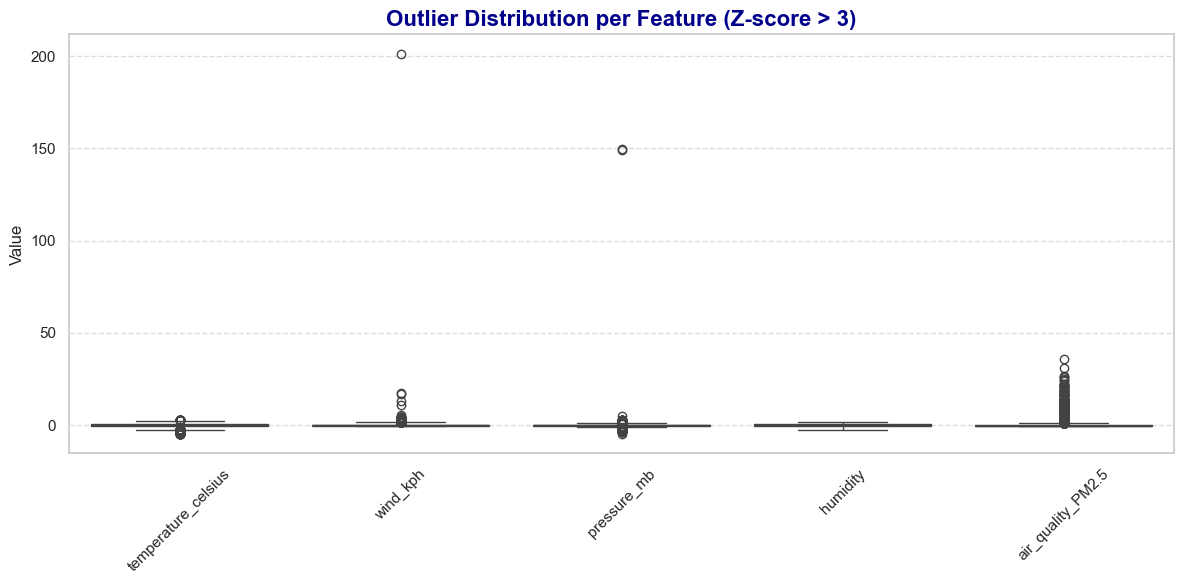

In [ ]:
mpl.rcParams['font.family'] = 'DejaVu Sans'

# Your plot code
mpl.figure(figsize=(12, 6))
sns.set(style="whitegrid")
colors = sns.color_palette("husl", len(outlier_cols))
sns.boxplot(data=dataset[outlier_cols], palette=colors)
mpl.title("Outlier Distribution per Feature (Z-score > 3)", fontsize=16, weight='bold', color='darkblue')
mpl.grid(axis='y', linestyle='--', alpha=0.7)
mpl.ylabel("Value", fontsize=12)
mpl.xticks(rotation=45, fontsize=11)
mpl.tight_layout()
mpl.show()


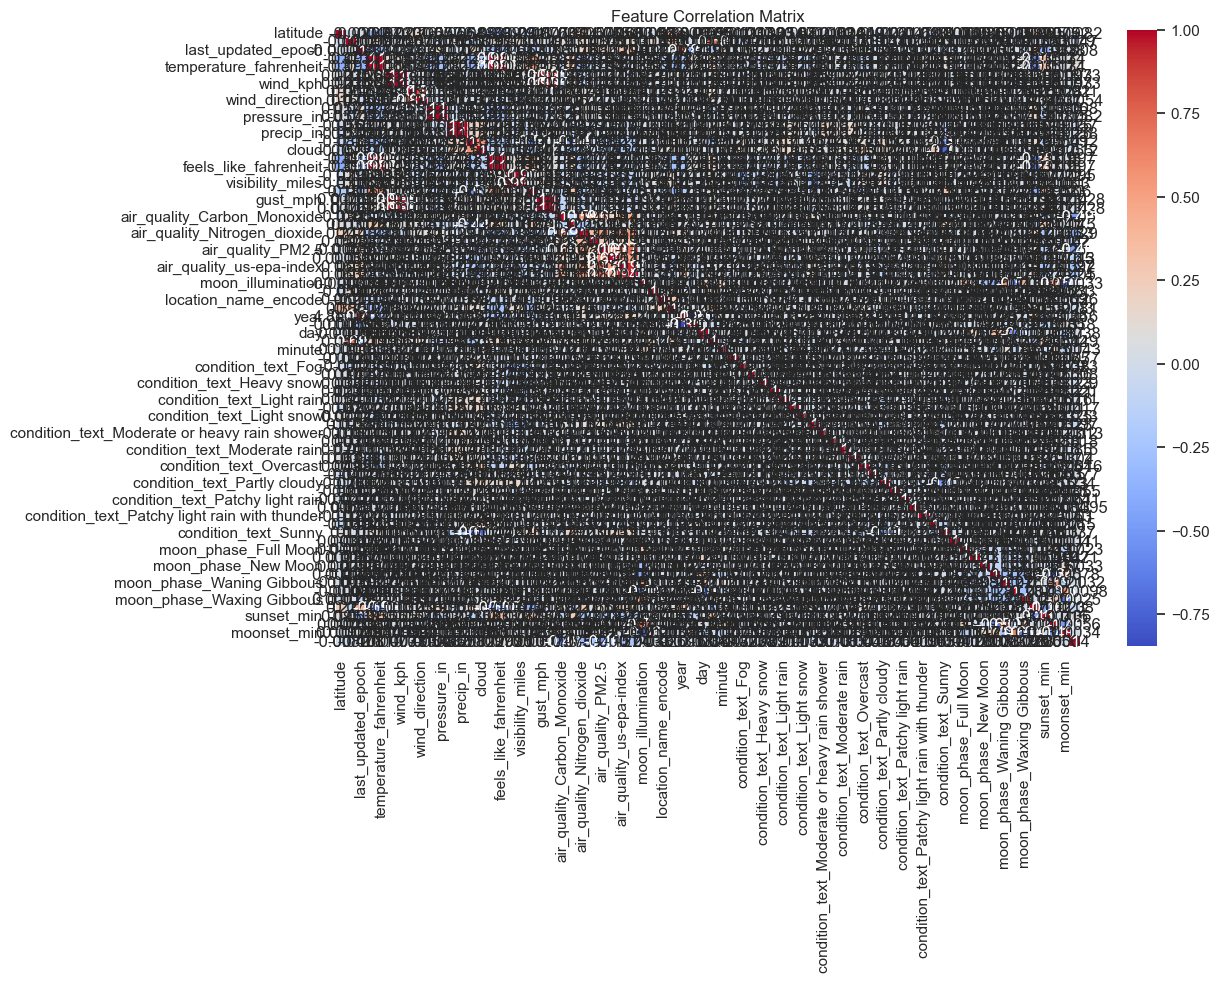

In [108]:
#Correlation Analysis
correlation_matrix = dataset.corr()

# Heatmap visualization
mpl.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
mpl.title('Feature Correlation Matrix')
mpl.show()

In [118]:
# Drop unnecessary columns
columns_to_drop = ['latitude', 'longitude', 'last_updated_epoch', 'temperature_fahrenheit', 
                   'feels_like_fahrenheit', 'condition_text_Cloudy', 'condition_text_Fog', 
                   'condition_text_Freezing fog', 'condition_text_Heavy snow', 'condition_text_Light drizzle', 
                   'condition_text_Light rain', 'condition_text_Light rain shower', 'condition_text_Light snow', 
                   'condition_text_Mist', 'condition_text_Moderate or heavy rain shower', 
                   'condition_text_Moderate or heavy rain with thunder', 'condition_text_Moderate rain', 
                   'condition_text_Others', 'condition_text_Overcast', 'condition_text_Partly Cloudy', 
                   'condition_text_Partly cloudy', 'condition_text_Patchy light drizzle', 
                   'condition_text_Patchy light rain', 'condition_text_Patchy light rain in area with thunder', 
                   'condition_text_Patchy light rain with thunder', 'condition_text_Patchy rain nearby', 
                   'condition_text_Sunny', 'condition_text_Thundery outbreaks in nearby', 
                   'moon_phase_Full Moon', 'moon_phase_Last Quarter', 'moon_phase_New Moon', 
                   'moon_phase_Waning Crescent', 'moon_phase_Waning Gibbous', 'moon_phase_Waxing Crescent', 
                   'moon_phase_Waxing Gibbous', 'sunrise_min', 'sunset_min', 'moonrise_min', 'moonset_min']

datasets = dataset.drop(columns=columns_to_drop, errors='ignore')

In [123]:
# Separate features and target variable
X = datasets.drop('temperature_celsius', axis=1)
y = datasets['temperature_celsius']

In [127]:
#Split dataset into train and test
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 1 Model Build by RandomForestRegressor

In [ ]:
#Initialize RandomForestRegressor and Train the model
rf_model = RandomForestRegressor(n_estimators=100,random_state=42)
rf_model.fit(x_train,y_train)

RandomForestRegressor(random_state=42)

In [132]:
# Predict the test set
y_prediction = rf_model.predict(x_test)

#### Model Evaluation

In [133]:
# Evaluate using RMSE
rmse_rf = np.sqrt(mean_squared_error(y_test, y_prediction))
print(f'Random Forest RMSE: {rmse_rf}')

Random Forest RMSE: 0.04474337053664308


# 2 Model build by Long shor term memory(LSTM)

In [135]:
# Reshape data for LSTM [samples, timesteps, features]
# We use 1 timestep here as we're not working with time-series sequences, but individual time points
X_train_lstm = np.reshape(x_train, (x_train.shape[0], 1, x_train.shape[1]))
X_test_lstm = np.reshape(x_test, (x_test.shape[0], 1, x_test.shape[1]))

# LSTM model architecture
lstm_model = Sequential()
lstm_model.add(LSTM(units=64, activation='relu', input_shape=(X_train_lstm.shape[1], X_train_lstm.shape[2])))
lstm_model.add(Dropout(0.2))
lstm_model.add(Dense(units=1))

# Compile and train the model
lstm_model.compile(optimizer='adam', loss='mean_squared_error')
lstm_model.fit(X_train_lstm, y_train, epochs=10, batch_size=32, validation_data=(X_test_lstm, y_test))

c:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
1564/1564 ━━━━━━━━━━━━━━━━━━━━ 19s 4ms/step - loss: 0.2266 - val_loss: 0.0092
Epoch 2/10
1564/1564 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 0.0230 - val_loss: 0.0067
Epoch 3/10
1564/1564 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - loss: 0.0195 - val_loss: 0.0068
Epoch 4/10
1564/1564 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 0.0189 - val_loss: 0.0063
Epoch 5/10
1564/1564 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - loss: 0.0212 - val_loss: 0.0058
Epoch 6/10
1564/1564 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - loss: 0.0161 - val_loss: 0.0057
Epoch 7/10
1564/1564 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: 0.0214 - val_loss: 0.0056
Epoch 8/10
1564/1564 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - loss: 0.0161 - val_loss: 0.0051
Epoch 9/10
1564/1564 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - loss: 0.0241 - val_loss: 0.0050
Epoch 10/10
1564/1564 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - loss: 0.0143 - val_loss: 0.0044


In [136]:
# Predict with the LSTM model
y_pred_lstm = lstm_model.predict(X_test_lstm)

391/391 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [137]:
# Evaluate using RMSE
rmse_lstm = np.sqrt(mean_squared_error(y_test, y_pred_lstm))
print(f'LSTM RMSE: {rmse_lstm}')


LSTM RMSE: 0.0659949929713932


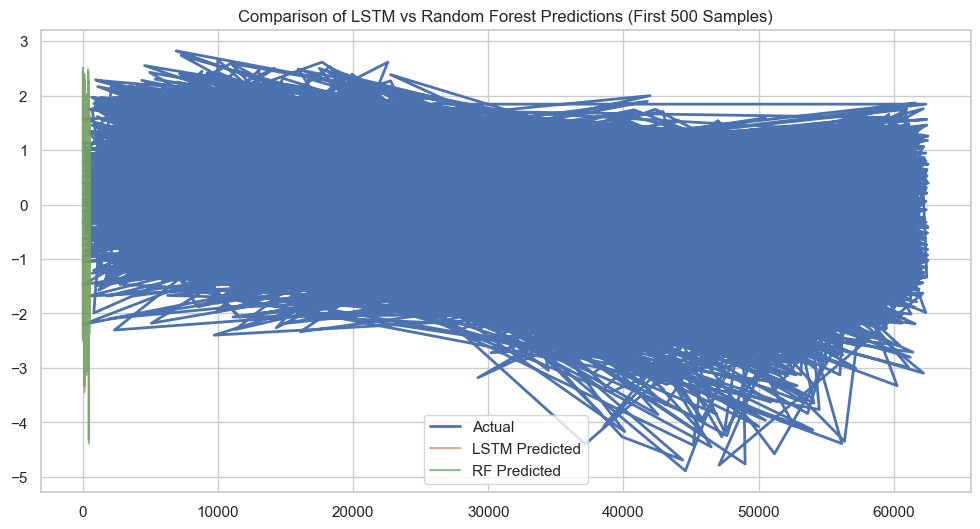

In [142]:
#compare
n=500
mpl.figure(figsize=(12, 6))
mpl.plot(y_test, label='Actual', linewidth=2)
mpl.plot(y_pred_lstm[:n], label='LSTM Predicted', alpha=0.7)
mpl.plot(y_prediction[:n], label='RF Predicted', alpha=0.7)
mpl.title(f"Comparison of LSTM vs Random Forest Predictions (First {n} Samples)")
mpl.legend()
mpl.show()


# Unique analysis

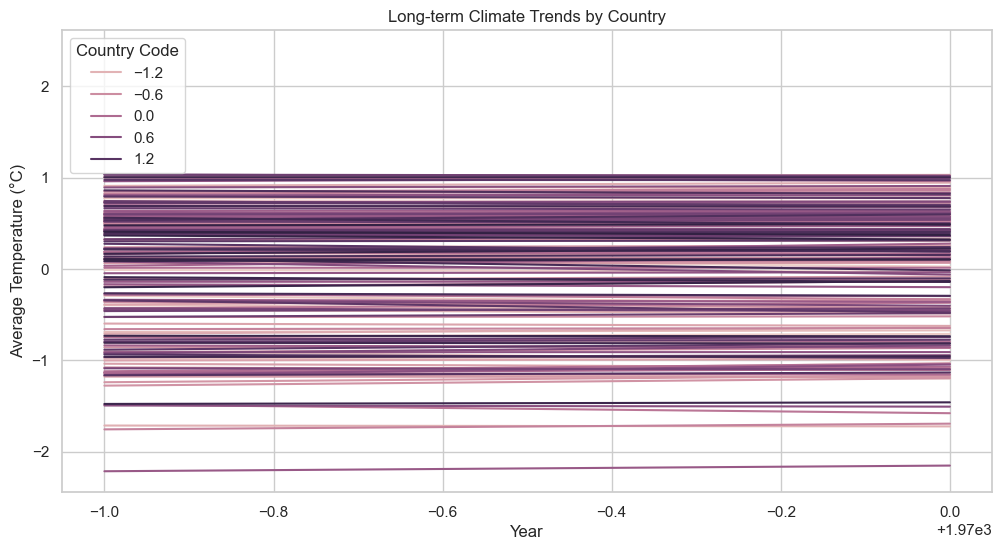

In [151]:
#climate anlaysis
datasets["day"] = pd.to_datetime(datasets["day"]) 
datasets["year"] = datasets["day"].dt.year
# Group by country and year
yearly_avg_temp = datasets.groupby(['country_encode', 'year'])['temperature_celsius'].mean().reset_index()

mpl.figure(figsize=(12, 6))
sns.lineplot(data=yearly_avg_temp, x='year', y='temperature_celsius', hue='country_encode')
mpl.title('Long-term Climate Trends by Country')
mpl.xlabel('Year')
mpl.ylabel('Average Temperature (°C)')
mpl.legend(title='Country Code')
mpl.show()


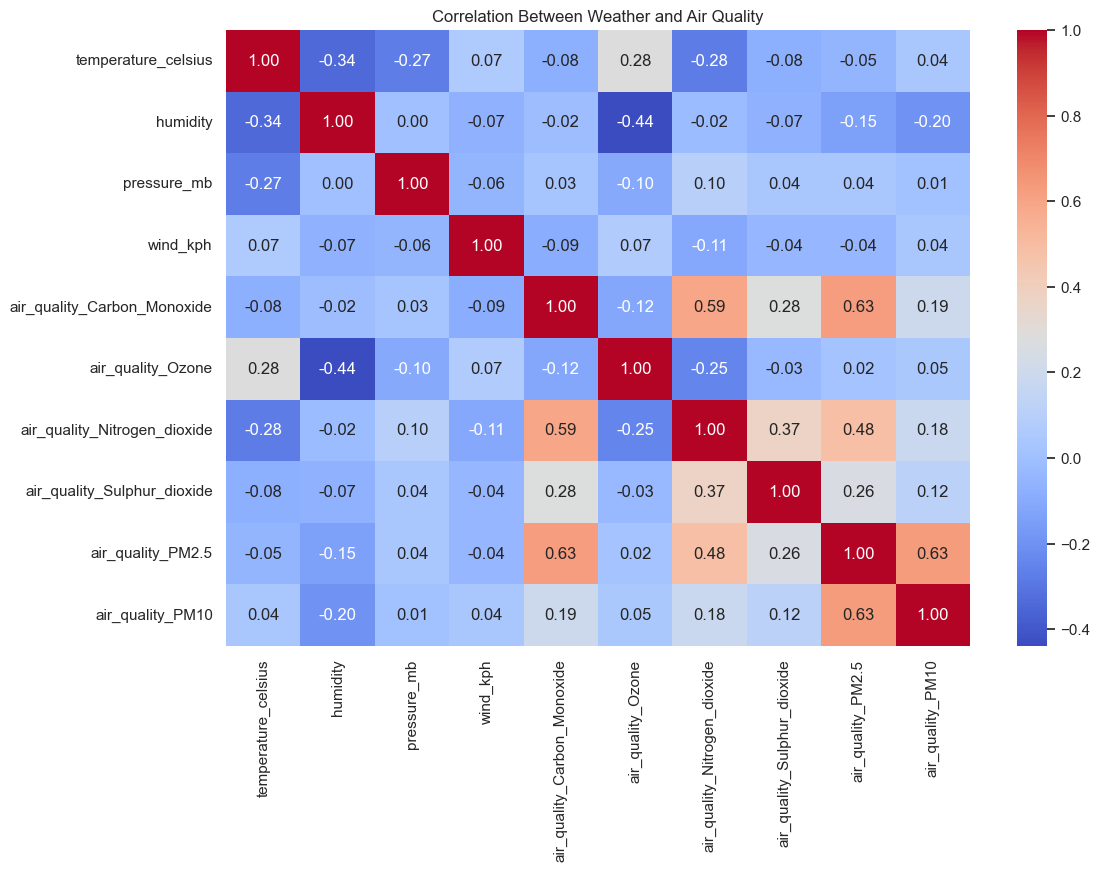

In [ ]:
#Enviornment analysis
# Select air quality + weather features
cols = [
    'temperature_celsius', 'humidity', 'pressure_mb', 'wind_kph',
    'air_quality_Carbon_Monoxide', 'air_quality_Ozone',
    'air_quality_Nitrogen_dioxide', 'air_quality_Sulphur_dioxide',
    'air_quality_PM2.5', 'air_quality_PM10'
]

corr_matrix = datasets[cols].corr()

# Plot
mpl.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
mpl.title("Correlation Between Weather and Air Quality")
mpl.show()


                         Feature  Importance
10            feels_like_celsius    0.958634
8                       humidity    0.034732
0                       wind_mph    0.001394
1                       wind_kph    0.001337
13                      uv_index    0.000659
5                    pressure_in    0.000300
26          location_name_encode    0.000225
17             air_quality_Ozone    0.000190
16   air_quality_Carbon_Monoxide    0.000176
27              timezone_encoded    0.000174
15                      gust_kph    0.000169
25                country_encode    0.000151
4                    pressure_mb    0.000151
14                      gust_mph    0.000149
31                          hour    0.000141
29                         month    0.000136
21              air_quality_PM10    0.000130
9                          cloud    0.000125
18  air_quality_Nitrogen_dioxide    0.000121
20             air_quality_PM2.5    0.000119
6                      precip_mm    0.000114
2         

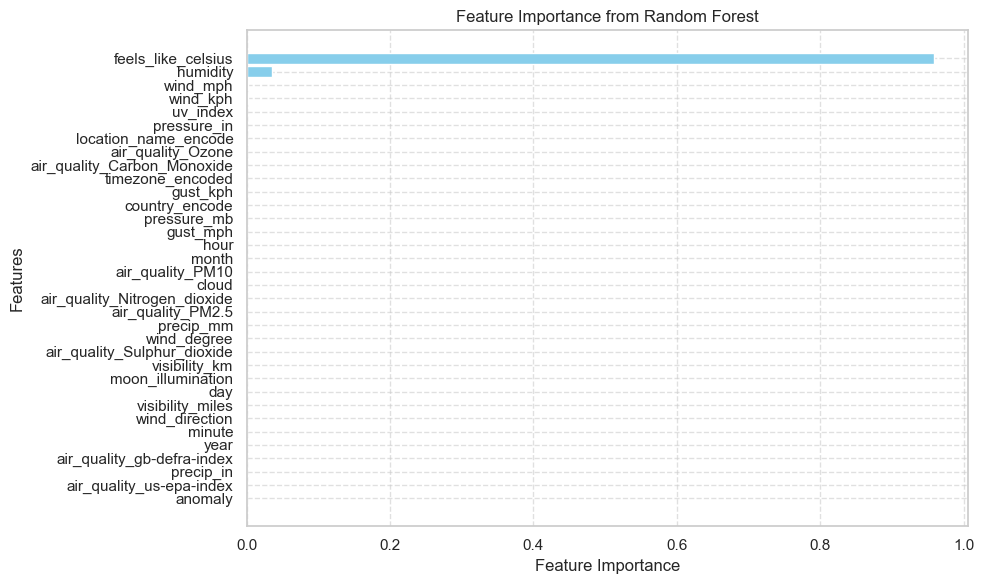

In [157]:
#feature importance
importances = rf_model.feature_importances_
# Create a sorted bar chart for feature importances
feature_importances = pd.DataFrame({'Feature': X.columns, 'Importance': importances})
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

# Print sorted feature importances
print(feature_importances)

# Plot feature importances
mpl.figure(figsize=(10, 6))
mpl.barh(feature_importances['Feature'], feature_importances['Importance'], color='skyblue')
mpl.xlabel('Feature Importance')
mpl.ylabel('Features')
mpl.title('Feature Importance from Random Forest')
mpl.gca().invert_yaxis()  # Invert y-axis for descending order
mpl.grid(True, linestyle='--', alpha=0.6)
mpl.tight_layout()
mpl.show()

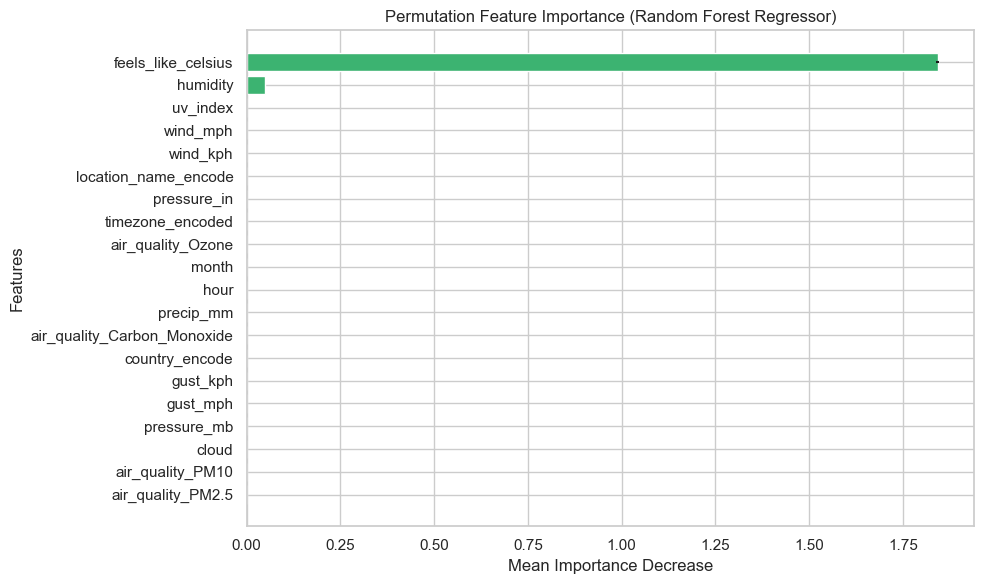

In [160]:
# Use scoring suitable for regression
perm_importance = permutation_importance(
    rf_model, X, y,
    n_repeats=10,
    random_state=42,
    scoring='r2'  # or 'neg_mean_squared_error', etc.
)

# Convert to DataFrame
perm_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance_Mean': perm_importance.importances_mean,
    'Importance_Std': perm_importance.importances_std
}).sort_values(by='Importance_Mean', ascending=False)

# Plot with mpl
mpl.figure(figsize=(10, 6))
mpl.barh(
    perm_df['Feature'].head(20),
    perm_df['Importance_Mean'].head(20),
    xerr=perm_df['Importance_Std'].head(20),
    color='mediumseagreen'
)
mpl.xlabel('Mean Importance Decrease')
mpl.ylabel('Features')
mpl.title('Permutation Feature Importance (Random Forest Regressor)')
mpl.gca().invert_yaxis()
mpl.tight_layout()
mpl.show()


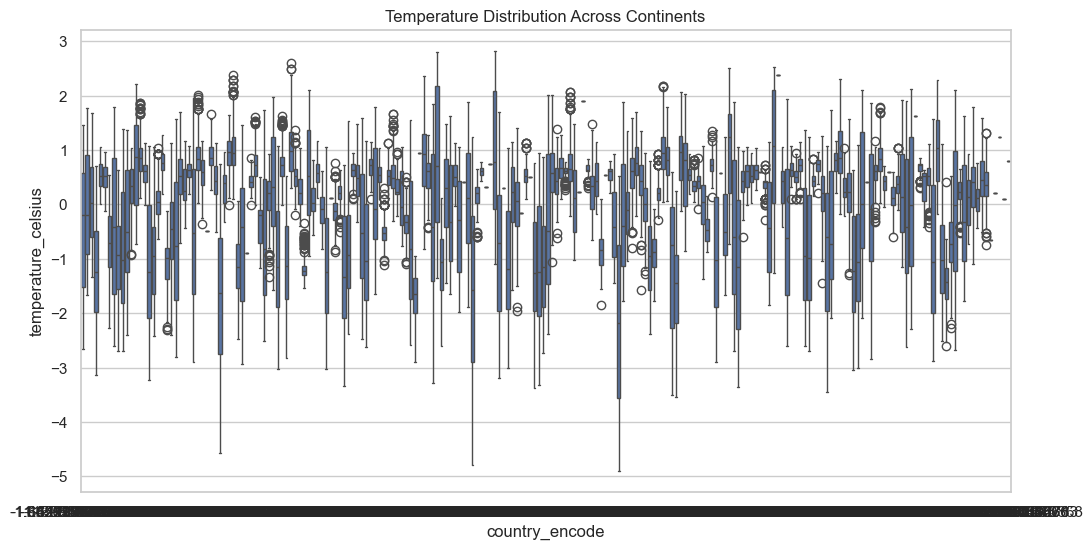

In [ ]:
# Geographical Patterns
mpl.figure(figsize=(12, 6))
sns.boxplot(data=datasets, x='country_encode', y='temperature_celsius')
mpl.title('Temperature Distribution Across Continents')
mpl.show()
